## Importing Dependencies

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data Collection and processing

In [4]:
# Load dataset into pandas Dataframe
car_data = pd.read_csv('/content/car data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.shape

(301, 9)

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Checking missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [12]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
car_data['Transmission'].value_counts()


Manual       261
Automatic     40
Name: Transmission, dtype: int64

<Axes: ylabel='count'>

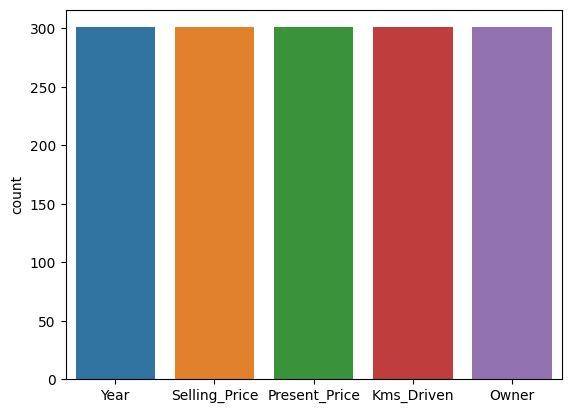

In [17]:
sns.countplot(data = car_data)

In [18]:
car_data.corr()

<ipython-input-18-8a5795352db6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<ipython-input-23-c4598cb9dd3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot = True)


<Axes: >

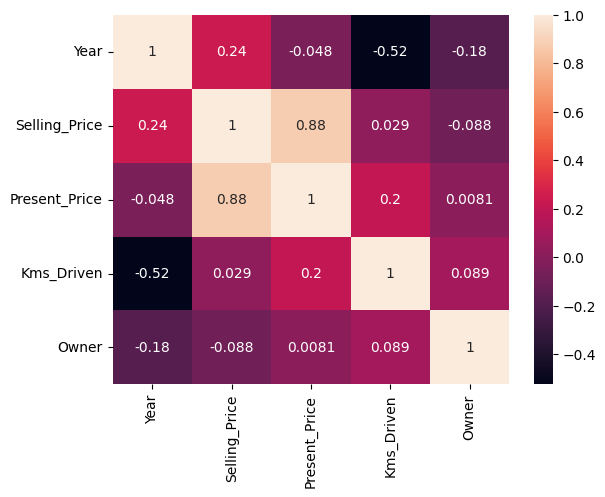

In [23]:
sns.heatmap(car_data.corr(), annot = True)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

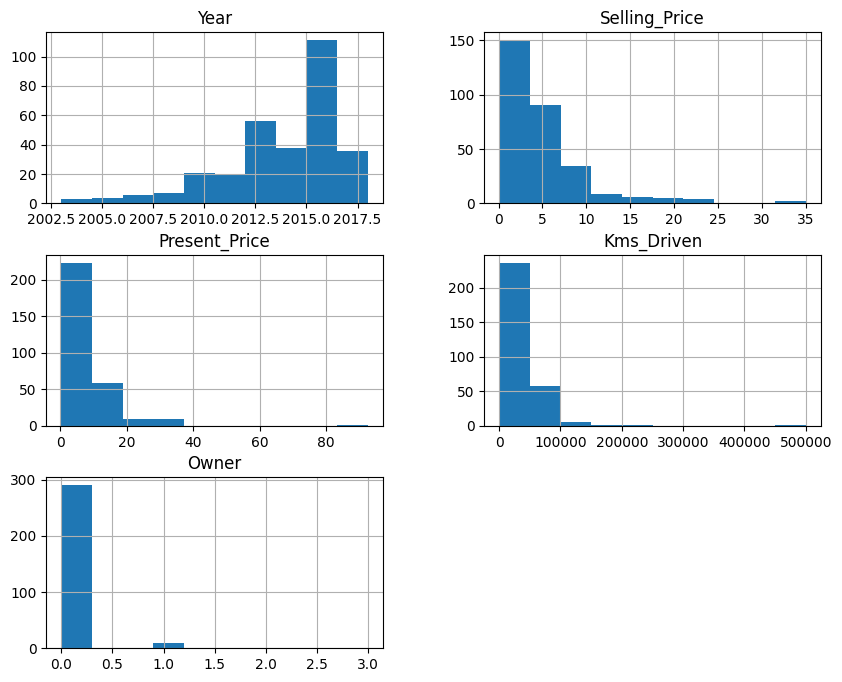

In [24]:
car_data.hist(figsize = (10, 8))

<Figure size 600x600 with 0 Axes>

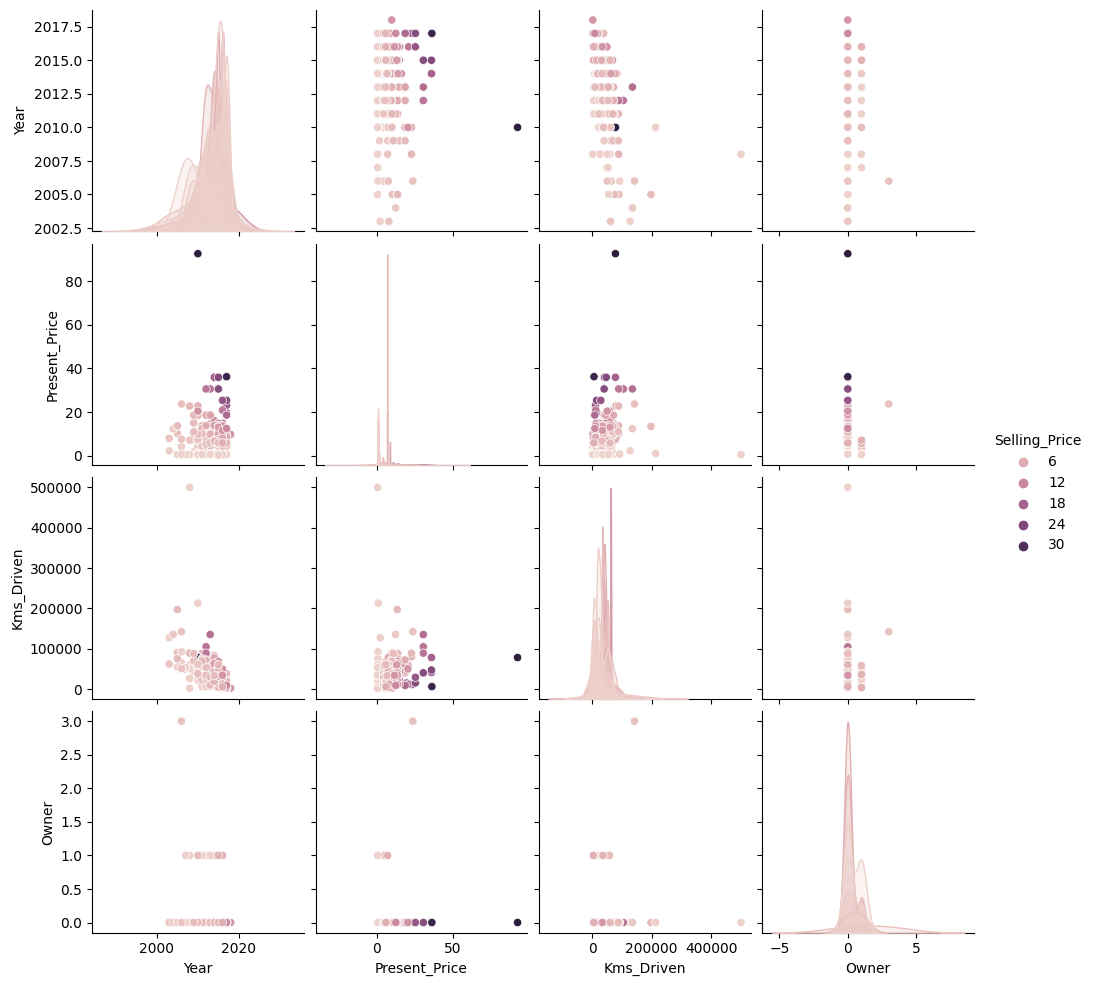

In [26]:
plt.figure(figsize = (6, 6))
sns.pairplot(data = car_data, hue = 'Selling_Price')

## Label Encoding the Categorical data

In [27]:
# Encoding Fuel_type column
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace = True)

# Encoding Seller_type column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)

# Encoding Transmission column
car_data.replace({'Transmission':{'Manual':0, 'Automatic': 1}}, inplace = True)

## Splitting data into Training and Testing data

In [30]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_data['Selling_Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, random_state = 42)

## Model Training: Linear Regression

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [39]:
# Prediction on training data
training_data_prediction = lin_reg.predict(X_train)
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f'R Squared Error: {error_score}')

R Squared Error: 0.9386703705310026


## Visualize the Actual prize and Predicted Price

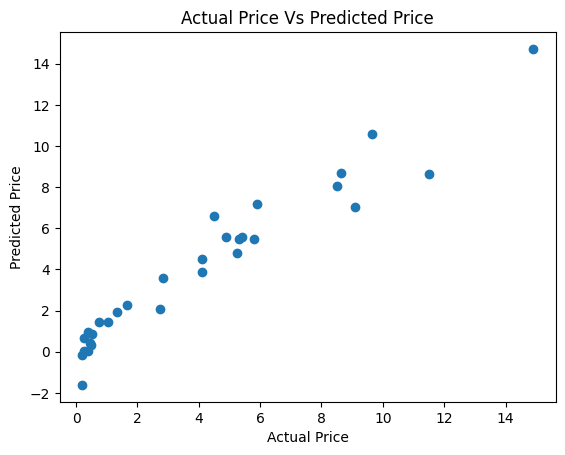

In [46]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show();

In [53]:
# Prediction on testing data
testing_data_prediction = lin_reg.predict(X_test)
error_score = metrics.r2_score(y_test, testing_data_prediction)
print(f'R Squared Error: {error_score}')

R Squared Error: 0.7797378950937275


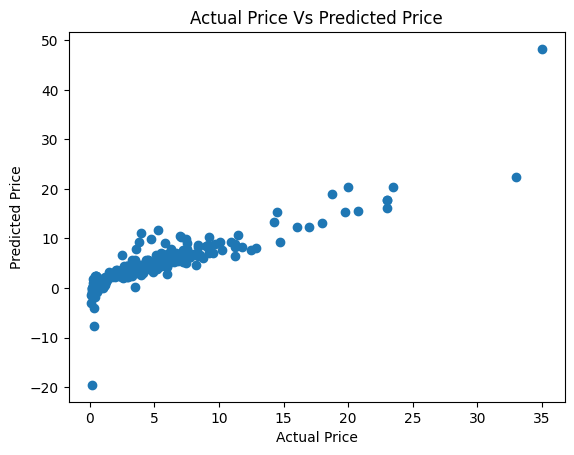

In [48]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show();

## Lasso Regression

In [49]:
lasso_reg = Lasso()

In [50]:
lasso_reg.fit(X_train, y_train)

Lasso()

### Model Evaluation

In [51]:
# Prediction on training data
training_data_prediction = lasso_reg.predict(X_train)
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f'R Squared Error: {error_score}')

R Squared Error: 0.9159132454108295


### Visualize the Actual Price and Predicted Price

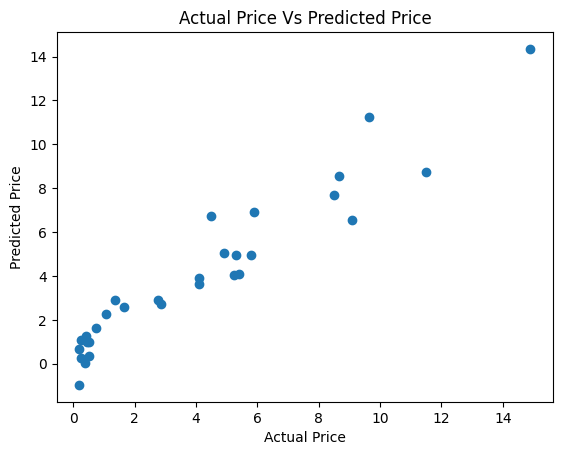

In [52]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show();

In [54]:
# Prediction on testing data
testing_data_prediction = lasso_reg.predict(X_test)
error_score = metrics.r2_score(y_test, testing_data_prediction)
print(f'R Squared Error: {error_score}')

R Squared Error: 0.7066261191682723


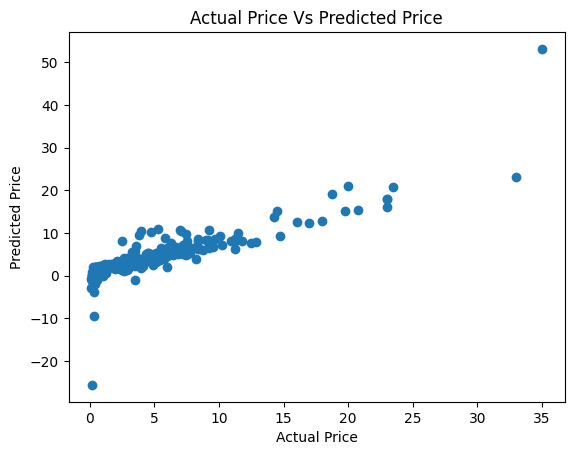

In [55]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show();